**Text Mining in R**

# Webcrawling, APIs und Webscraping

Jan R. Riebling

In [42]:
library(tidyverse)

# Interaktion mit Webressourcen

## URL

* [Uniform Ressource Locator](https://en.wikipedia.org/wiki/URL).
* Spezifiziert das Übertragungsprotokoll sowie den Ort an dem eine bestimmte Ressource im Netzwerk zu finden ist.
* Generelle Form:  
```
scheme://domain:port/path?query_string#fragment_id
```

* Hypertext Transfer Protocol: [http://www.example.org/wiki/Main_Page](http://www.example.org/wiki/Main_Page).


## HTTP

Zentrales [Protokoll](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol) zur Kommunikation mit Servern und Webservices. In R können Interaktionen mittels HTTP über das `httr` [Paket](https://httr.r-lib.org/) stattfinden. Zentrale Methoden:

* GET: Fordert Zielressource auf eine Repräsentation des gegenwärtigen Zustandes zurückzusenden.
* POST: Übermittelt ein Datenpaket und fordert die Zielressource auf dieses mittels der Semantik der Zielressource zu verarbeiten.

## GET

Beispiel: [Übersicht der Vorschriften auf gesetze-bayern.de](https://www.gesetze-bayern.de/Search/Filter/DOKTYP/norm).

Einfachere Alternative:

```R
xml2::read_html(url)
```

In [44]:
url_base <- 'https://www.gesetze-bayern.de'
url <- str_c(url_base, '/Search/Filter/DOKTYP/norm')
url

[1] "https://www.gesetze-bayern.de/Search/Filter/DOKTYP/norm"

In [5]:
response <- GET(url)

In [9]:
content(response)

{html_document}
<html lang="de">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\r\n\r\n<form action="/Search" id="searchForm" method="post">\n<nav ...

In [37]:
raw_html <- content(response, 'text')
print(raw_html)

[1] "<!DOCTYPE html>\r\n<html lang=\"de\">\r\n<head>\r\n    <meta http-equiv=\"X-UA-Compatible\" content=\"IE=edge\" />\r\n    <meta name=\"viewport\" content=\"width=device-width, initial-scale=1\" />\r\n\r\n    <title>Trefferliste - B&#252;rgerservice</title>\r\n    <link href=\"/favicon.ico\" rel=\"shortcut icon\" type=\"image/x-icon\" />\r\n\r\n    <!-- CSS -->\r\n    <link href=\"/Styles/bootstrap.min.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/site.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/content.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/search.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/tree.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/hitlist.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/nav.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/footer.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/bootstrap-treeview.css\" rel=\"stylesheet\" />\r\n    <link href=\"/Styles/bootstrap-datepicker3.s

In [36]:
## Print to file
cat(raw_html, file='../data/bayern_recht_vorschriften_1.html')

# Webscraping

## Screen scraping

Daten vom Bildschirm „abkratzen“, d.h. Daten die dem Nutzer angezeigt werden. Da von Browsern dargestellte HTML-Dokumente eine der meistgenutzten Datenquellen sind, spricht man auch vom „web scraping“.

## HyperText Markup Language

Beschreibt die Semantik eines HTML-Dokuments. Besteht aus einem *Baum* einzelner HTML-Elemente. Jedes Element besteht aus drei Teilen:

```html
<a href="https://www.wikipedia.org/">A link to Wikipedia!</a>
```

1. Die $\color{green}{\mathit{Tags}}$, die das Element eröffnen und schließen.
2. Die $\color{blue}{\mathit{Attribute}}$ des Elements, die sich innerhalb des eröffnenden Tags finden und deren dazugehöriger $\color{red}{\mathit{Wert}}$.
3. Der $\mathit{Text}$ der „marked up“ werden soll. 

<a href="https://www.wikipedia.org/">A link to Wikipedia!</a>

## Formaler Aufbau

HTML Dokumente sind als Baumgraphen aufgebaut, d.h. sie beginnen in einer Wurzel (root) und breiten sich über Zweige (branches) aus. Daher kann jeder Knoten dieses Baumgraphs über einen eineindeutigen Pfad angesteuert werden. 

## Ein Baum:

![A tree](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Binary_tree.svg/300px-Binary_tree.svg.png)

## Parsen

Mittels des `rvest` [Pakets](https://www.rdocumentation.org/packages/rvest/versions/1.0.3) können Knoten in einem geparsten HTML-Dokument spezifiziert werden. Zur Spezifikation werden CSS Selektoren verwendet.

## CSS Selector

Das Cascading Style eines HTML-Dokuments gibt an, welche Formatierung an welchem Knotenpunkt gelten soll. Daher kann die Syntax von CSS Selektoren genutzt werden um Knoten im Graphen des HTML-Dokuments zu spezifizieren. Eine knappe Einführung in die Syntax findet sich [hier](https://en.wikipedia.org/wiki/CSS#Selector) und [hier](https://www.w3schools.com/CSS/css_selectors.asp). 

Das Auffinden von Elementen mittels CSS Selektoren kann durch entsprechende Browsererweiterungen erleichtert werden (z.B.: [SelectorGadget](https://selectorgadget.com/)).

## Knoten ansteuern

In [40]:
## gesetz-bayern.de auf Dokumente weiter verweisende links:
html <- content(response) 

html %>% html_nodes('div.hltitel a')

{xml_nodeset (10)}
 [1] <a href="/Content/Document/BayVwV96520?hl=true"><b>15-Punkte-Programm de ...
 [2] <a href="/Content/Document/BayVwV151716?hl=true">2002-F Geschäftsordnung ...
 [3] <a href="/Content/Document/BayVwV101445?hl=true">2003.4-I Satzung der An ...
 [4] <a href="/Content/Document/BayVwV153873?hl=true">2003.4-J Dienstvereinba ...
 [5] <a href="/Content/Document/BayVwV151469?hl=true">2012.1-I Vollzug des Po ...
 [6] <a href="/Content/Document/BayVwV123847?hl=true">2025-I Muster einer Bei ...
 [7] <a href="/Content/Document/BayVwV230264?hl=true">2030-F Verwaltungsvorsc ...
 [8] <a href="/Content/Document/BayVV_2030_10_F_198?hl=true">2030.10-F Satzun ...
 [9] <a href="/Content/Document/BayVwV246830?hl=true">2030.11-F Allgemeine Re ...
[10] <a href="/Content/Document/BayVV_2030_2_3_K_12038?hl=true">2030.2.3-K Ri ...

## Attribut aufrufen

In [41]:
html %>% html_nodes('div.hltitel a') %>% html_attr('href')

[1] "/Content/Document/BayVwV96520?hl=true"           
 [2] "/Content/Document/BayVwV151716?hl=true"          
 [3] "/Content/Document/BayVwV101445?hl=true"          
 [4] "/Content/Document/BayVwV153873?hl=true"          
 [5] "/Content/Document/BayVwV151469?hl=true"          
 [6] "/Content/Document/BayVwV123847?hl=true"          
 [7] "/Content/Document/BayVwV230264?hl=true"          
 [8] "/Content/Document/BayVV_2030_10_F_198?hl=true"   
 [9] "/Content/Document/BayVwV246830?hl=true"          
[10] "/Content/Document/BayVV_2030_2_3_K_12038?hl=true"

## Weiterführende URL konstruieren

In [46]:
links <- html %>% html_nodes('div.hltitel a') %>% html_attr('href')

str_c(url_base, links)

[1] "https://www.gesetze-bayern.de/Content/Document/BayVwV96520?hl=true"           
 [2] "https://www.gesetze-bayern.de/Content/Document/BayVwV151716?hl=true"          
 [3] "https://www.gesetze-bayern.de/Content/Document/BayVwV101445?hl=true"          
 [4] "https://www.gesetze-bayern.de/Content/Document/BayVwV153873?hl=true"          
 [5] "https://www.gesetze-bayern.de/Content/Document/BayVwV151469?hl=true"          
 [6] "https://www.gesetze-bayern.de/Content/Document/BayVwV123847?hl=true"          
 [7] "https://www.gesetze-bayern.de/Content/Document/BayVwV230264?hl=true"          
 [8] "https://www.gesetze-bayern.de/Content/Document/BayVV_2030_10_F_198?hl=true"   
 [9] "https://www.gesetze-bayern.de/Content/Document/BayVwV246830?hl=true"          
[10] "https://www.gesetze-bayern.de/Content/Document/BayVV_2030_2_3_K_12038?hl=true"

# Webcrawling

## Vorgehen

1. Basis-URL festlegen (*seed*).
2. Weiterführende Links identifizieren (*crawl frontier*).
3. Regeln zur Auswahl spezifischer Hyperlinks (*policies*).

Dieser Vorgang wird rekursiv gemacht indem die ausgewählten Links als Ausgangslage für den nächsten Crawlvorgang herangezogen werden.

## Benimmregeln

Immer mit der Rechtslage des jeweiligen Landes (eigener Standort und Server) vertraut sein! Unbedingt die Terms of Service beachten!

Zusätzlich:

* Nur so viel, wie man braucht!
* Crawlzeiten sollten möglichst an die Bedürfnisse des Servers und der jeweiligen Community angepasst sein. Ruhezeiten sollten eingeplant werden.
* Reduktion der Serverlast soweit wie möglich!
* Anständig bleiben! Belästigung oder Schaden für die Nutzer des Webdienstes sollten unbedingt vermieden werden.
* Privatsphäre achten!

## Beispiel: [gesetze-bayern.de](https://www.gesetze-bayern.de/Search/Filter/DOKTYP/norm)

* Aufgabe: Herunterladen aller Vorschriften.

## Tips und Tricks

* Aufbau der Webseite studieren.
* Auschau nach fortlaufenden Nummern halten.
* Gibt es Archiv oder Überblicksseiten.

## Seed konstruieren

Ausgehend von https://www.gesetze-bayern.de/Search/Filter/DOKTYP/norm sollen die URLs der Einzeldokumente ermittelt werden.

Problem: Die Suchanfrage braucht zusätzliche Informationen, die nicht in der URL kodiert sind, sondern serverseitig verwaltet werden.

## Stabile Verbindung

Um die selben Cookies und Hintergrundaten über mehrer Verbindungen zu erhalten kann `httr::handle()` genutzt werden. Dies wird standardmäßig von `httr` angenommen, aber es kann dennoch sinnvoll sein den Handle explizit zu setzen.

In [68]:
h <- handle('https://www.gesetze-bayern.de')

response <- GET('https://www.gesetze-bayern.de/Search/Filter/DOKTYP/norm', handle=h)

## URLs konstruieren

Nur die ersten zehn um das Vorgehen zu verdeutlichen. 

In [80]:
seeds <- str_c('https://www.gesetze-bayern.de/Search/Page/', c(1:10))
seeds

[1] "https://www.gesetze-bayern.de/Search/Page/1" 
 [2] "https://www.gesetze-bayern.de/Search/Page/2" 
 [3] "https://www.gesetze-bayern.de/Search/Page/3" 
 [4] "https://www.gesetze-bayern.de/Search/Page/4" 
 [5] "https://www.gesetze-bayern.de/Search/Page/5" 
 [6] "https://www.gesetze-bayern.de/Search/Page/6" 
 [7] "https://www.gesetze-bayern.de/Search/Page/7" 
 [8] "https://www.gesetze-bayern.de/Search/Page/8" 
 [9] "https://www.gesetze-bayern.de/Search/Page/9" 
[10] "https://www.gesetze-bayern.de/Search/Page/10"

## URLs der Dokumente

In [86]:
frontier <- c()

for (url in seeds) {
    html <- content(GET(url, handle=h))
    links <- html %>% html_nodes('div.hltitel a') %>% html_attr('href')
    frontier <- append(frontier, str_c(url_base, links))
}

In [87]:
frontier

[1] "https://www.gesetze-bayern.de/Content/Document/BayVwV96520?hl=true"                 
  [2] "https://www.gesetze-bayern.de/Content/Document/BayVwV151716?hl=true"                
  [3] "https://www.gesetze-bayern.de/Content/Document/BayVwV101445?hl=true"                
  [4] "https://www.gesetze-bayern.de/Content/Document/BayVwV153873?hl=true"                
  [5] "https://www.gesetze-bayern.de/Content/Document/BayVwV151469?hl=true"                
  [6] "https://www.gesetze-bayern.de/Content/Document/BayVwV123847?hl=true"                
  [7] "https://www.gesetze-bayern.de/Content/Document/BayVwV230264?hl=true"                
  [8] "https://www.gesetze-bayern.de/Content/Document/BayVV_2030_10_F_198?hl=true"         
  [9] "https://www.gesetze-bayern.de/Content/Document/BayVwV246830?hl=true"                
 [10] "https://www.gesetze-bayern.de/Content/Document/BayVV_2030_2_3_K_12038?hl=true"      
 [11] "https://www.gesetze-bayern.de/Content/Document/BayVV_2030_2_3_K_11961?hl=true"      
 [12] "https://www.gesetze-bayern.de/Content/Document/BayVwV235695?hl=true"                
 [13] "https://www.gesetze-bayern.de/Content/Document/BayVwV246838?hl=true"                
 [14] "https://www.gesetze-bayern.de/Content/Document/BayVwV156869?hl=true"                
 [15] "https://www.gesetze-bayern.de/Content/Document/BayVV_2033_F_794?hl=true"            
 [16] "https://www.gesetze-bayern.de/Content/Document/BayVwV159082?hl=true"                
 [17] "https://www.gesetze-bayern.de/Content/Document/BayVV_2126_G_13083?hl=true"          
 [18] "https://www.gesetze-bayern.de/Content/Document/BayVV_2129_0_U_13237?hl=true"        
 [19] "https://www.gesetze-bayern.de/Content/Document/BayVV_2129_0_U_13168?hl=true"        
 [20] "https://www.gesetze-bayern.de/Content/Document/BayVwV96886?hl=true"                 
 [21] "https://www.gesetze-bayern.de/Content/Document/BayVV_2132_3_B_13011?hl=true"        
 [22] "https://www.gesetze-bayern.de/Content/Document/BayVV_2174_A_12788?hl=true"          
 [23] "https://www.gesetze-bayern.de/Content/Document/BayVV_2230_UK_281?hl=true"           
 [24] "https://www.gesetze-bayern.de/Content/Document/BayVV_2230_1_1_1_K_13253?hl=true"    
 [25] "https://www.gesetze-bayern.de/Content/Document/BayVwV155123?hl=true"                
 [26] "https://www.gesetze-bayern.de/Content/Document/BayVV_2246_WK_1022?hl=true"          
 [27] "https://www.gesetze-bayern.de/Content/Document/BayVV_2253_D_12245?hl=true"          
 [28] "https://www.gesetze-bayern.de/Content/Document/BayVV_2330_B_12898?hl=true"          
 [29] "https://www.gesetze-bayern.de/Content/Document/BayVwV249015?hl=true"                
 [30] "https://www.gesetze-bayern.de/Content/Document/BayEBekMiZi?hl=true"                 
 [31] "https://www.gesetze-bayern.de/Content/Document/BayVwV244305?hl=true"                
 [32] "https://www.gesetze-bayern.de/Content/Document/BayPKHGDB?hl=true"                   
 [33] "https://www.gesetze-bayern.de/Content/Document/BayVwV153858?hl=true"                
 [34] "https://www.gesetze-bayern.de/Content/Document/BayVwV252304?hl=true"                
 [35] "https://www.gesetze-bayern.de/Content/Document/BayVV_3122_2_3_J_321?hl=true"        
 [36] "https://www.gesetze-bayern.de/Content/Document/BayGBGA?hl=true"                     
 [37] "https://www.gesetze-bayern.de/Content/Document/BayVV_360_J_243?hl=true"             
 [38] "https://www.gesetze-bayern.de/Content/Document/BayVV_2126_8_2_G_13153?hl=true"      
 [39] "https://www.gesetze-bayern.de/Content/Document/BayVV_605_B_10243?hl=true"           
 [40] "https://www.gesetze-bayern.de/Content/Document/VVBayHO?hl=true"                     
 [41] "https://www.gesetze-bayern.de/Content/Document/BayVV_6410_F_121?hl=true"            
 [42] "https://www.gesetze-bayern.de/Content/Document/BayVV_7072_1_W_13128?hl=true"        
 [43] "https://www.gesetze-bayern.de/Content/Document/BayVwV288117?hl=true"                
 [44] "https://www.gesetze-bayern.de/Content/D

## Download

In zwei Formaten, als HTML und als PDFs.

## HTML

Problem: Die heruntergeladenen URLs zeigen nur eine Vorschau der Publikation.

In [95]:
frontier[1]

[1] "https://www.gesetze-bayern.de/Content/Document/BayVwV96520?hl=true"

## Dokument IDs extrahieren

In [107]:
str_match(frontier, '.+/(.+)\\?')

https://www.gesetze-bayern.de/Content/Document/BayVwV96520?,BayVwV96520
https://www.gesetze-bayern.de/Content/Document/BayVwV151716?,BayVwV151716
https://www.gesetze-bayern.de/Content/Document/BayVwV101445?,BayVwV101445
https://www.gesetze-bayern.de/Content/Document/BayVwV153873?,BayVwV153873
https://www.gesetze-bayern.de/Content/Document/BayVwV151469?,BayVwV151469
https://www.gesetze-bayern.de/Content/Document/BayVwV123847?,BayVwV123847
https://www.gesetze-bayern.de/Content/Document/BayVwV230264?,BayVwV230264
https://www.gesetze-bayern.de/Content/Document/BayVV_2030_10_F_198?,BayVV_2030_10_F_198
https://www.gesetze-bayern.de/Content/Document/BayVwV246830?,BayVwV246830
https://www.gesetze-bayern.de/Content/Document/BayVV_2030_2_3_K_12038?,BayVV_2030_2_3_K_12038
https://www.gesetze-bayern.de/Content/Document/BayVV_2030_2_3_K_11961?,BayVV_2030_2_3_K_11961


In [109]:
doc_ids <- str_match(frontier, '.+/(.+)\\?')[,2]
doc_ids

[1] "BayVwV96520"                  "BayVwV151716"                
  [3] "BayVwV101445"                 "BayVwV153873"                
  [5] "BayVwV151469"                 "BayVwV123847"                
  [7] "BayVwV230264"                 "BayVV_2030_10_F_198"         
  [9] "BayVwV246830"                 "BayVV_2030_2_3_K_12038"      
 [11] "BayVV_2030_2_3_K_11961"       "BayVwV235695"                
 [13] "BayVwV246838"                 "BayVwV156869"                
 [15] "BayVV_2033_F_794"             "BayVwV159082"                
 [17] "BayVV_2126_G_13083"           "BayVV_2129_0_U_13237"        
 [19] "BayVV_2129_0_U_13168"         "BayVwV96886"                 
 [21] "BayVV_2132_3_B_13011"         "BayVV_2174_A_12788"          
 [23] "BayVV_2230_UK_281"            "BayVV_2230_1_1_1_K_13253"    
 [25] "BayVwV155123"                 "BayVV_2246_WK_1022"          
 [27] "BayVV_2253_D_12245"           "BayVV_2330_B_12898"          
 [29] "BayVwV249015"                 "BayEBekMiZi"                 
 [31] "BayVwV244305"                 "BayPKHGDB"                   
 [33] "BayVwV153858"                 "BayVwV252304"                
 [35] "BayVV_3122_2_3_J_321"         "BayGBGA"                     
 [37] "BayVV_360_J_243"              "BayVV_2126_8_2_G_13153"      
 [39] "BayVV_605_B_10243"            "VVBayHO"                     
 [41] "BayVV_6410_F_121"             "BayVV_7072_1_W_13128"        
 [43] "BayVwV288117"                 "BayVV_7538_U_11673"          
 [45] "BayVV_787_L_12981"            "BayVV_787_L_11948"           
 [47] "BayVV_787_L_12290"            "BayVwV97405"                 
 [49] "BayVwV263703"                 "BayVwV97484"                 
 [51] "BayVwV154227"                 "BayAbfZustV"                 
 [53] "BayVV_2240_K_823"             "BayVwV96453"                 
 [55] "BayVwV97275"                  "AkadGrAuslHsStV"             
 [57] "BaySalKonvVertr"              "medPrFAbk"                   
 [59] "PFAAbk"                       "LaenderPolAbk"               
 [61] "SeeVertAbk"                   "StVollzZErwAbk"              
 [63] "ZLGAbk"                       "StVDDRFachschGlAO"           
 [65] "SiTechZStV"                   "StVAbkGleichHochBil"         
 [67] "BayWKrSaalachBek"             "BayVwV151525"                
 [69] "BayAbmG"                      "BayVV_2032_4_F_11288"        
 [71] "BayVwV294820"                 "BayZuwVAdwAG"                
 [73] "BayVwV238759"                 "BayVwV97653"                 
 [75] "BayVwV97282"                  "BayVV_2155_I_11786"          
 [77] "BayVwV97338"                  "BayFakaLwV"                  
 [79] "BayVV_2038_3_7_W_195"         "BayVV_2190_F_126"            
 [81] "BayAktO"                      "BayVV_215_I_2279"            
 [83] "BayVV_7537_U_10497"           "BayVV_2021_I_10806"          
 [85] "BayVV_1300_I_11360"           "BayAVVForst"                 
 [87] "VerschLAVerf"                 "BayABOB"                     
 [89] "BayVV_2032_4_F_1034"          "BayVV_2129_0_U_562"          
 [91] "BayAPO"                       "BayAGO"                      
 [93] "BayVwV96713"                  "BayVV_235_B_10303"           
 [95] "BayVwV97243"                  "BayVV_2230_1_1_1_1_0_K_12367"
 [97] "BayAlmG"                      "BayFAGDV_Alt"                
 [99] "BayVV_810_A_12871"            "BayVwV97547"

## HTML Gesamtansicht

In [114]:
for (doc_id in doc_ids) {
    url <- str_c('https://www.gesetze-bayern.de/Content/Document/', doc_id, '/true')
    html_text <- content(GET(url), 'text')
    cat(html_text, file=str_c('../data/GesetzeBayernHTML/', doc_id, '.html'))
}

## PDFs herunterladen

In [117]:
response_log <- c()

for (doc_id in doc_ids) {
    url <- str_c('https://www.gesetze-bayern.de/Content/Pdf/', doc_id, '?all=True')
    response <- GET(url, write_disk(str_c('../data/GesetzeBayernPDF/', doc_id, '.pdf'), overwrite=TRUE))
    response_log <- append(response_log, response)
}

# Application Programming Interface

## API

* Schnittstelle zur Interaktion zwischen Programmen oder Programmen und Servern.
* WebAPIs:
    * Abruf/Veränderung von Ressourcen (GET vs. POST).
    * Client-Server Beziehung.
    * Vermittelt durch HTTP.
    * Daten meist in Form der Webstandards für Dokumente (z.B. JSON oder XML).
* Für viele APIs ist eine vorherige Anmeldung notwendig.

![Munzert et al. 2015: 259](../figures/munzert_et_al_2015_p259_api.PNG)
*Munzert et al. 2015: 259. Automated Data Collection with R.*

##  Funktionsweise

* Aufbau einer HTTP Anfrage entsprechend dem URL Schema.
    * Konkrete Anfrage geschieht über `?query_string`.
    * Übersetzung von Programmcode in die spezifische Anfrage
* Änderung des Zustands des Servers oder Abrufen von Daten
* Übersetzung der Daten in Elemente der Programmumgebung


```
scheme://domain:port/path?query_string#fragment_id
```

## API Wrappers

Zwar ist es immer möglich eine direkte Anfrage an den Server zu schicken (z.B. mittels `httr`), doch in vielen Fällen bietet sich die einfachere Variante an einen bereits bestehenden „Wrapper“ zu benutzen. Dabei handelt es sich um Abstraktionen, welche die Interaktion mit der API übernehmen. Um einen solchen Wrapper zu finden ist es meistens ausreichend eine Suchanfrage der Art:

```
<Name der Anwendung> R api
```

zu stellen.

# Beispiel: World Bank Indicators 

## World Bank Indicators

* Offen zugängliche Datensätze der Weltbank.
* Dokumentation: [http://data.worldbank.org/developers/api-overview](http://data.worldbank.org/developers/api-overview).
* Beispiel R Wrapper:
    * `wbstats`.
    * `WDI`.

## Manuelles Vorgehen

1. Konstruktion der URL.
2. Daten anfragen.
3. Daten parsen.

## Parameter:

* Daten für GDP per capita.
* Für die Länder:
    * Mexiko
    * Kanada
    * USA
* Jahre: 1960 bis 2012.

## 1. Konstruktion der URL

Öffentliche APIs haben für gewöhnlich auch eine [Dokumentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-api-documentation).

Basis ist eine URL die mit verschiedenen `query` Parametern modifiziert wird:


`http://api.worldbank.org/v2/country/`\<iso2/3-countries>`/indicator/`\<indicator-code>`?`\<query>


In [120]:
## Mexiko, Kanada und USA gdp per capita
url <- 'http://api.worldbank.org/v2/countries/mx;ca;us/indicators/NY.GDP.PCAP.CD?date=1960:2012&format=JSON'

## 2. Daten anfragen

Mit `httr` lässt sich eine GET Anfrage stellen. Zusätzlich zur URL können hier auch `query` Parameter angegeben werden.

In [121]:
## Eingrenzen der Jahre auf 1960 bis 2012 und Rückgabeformat=JSON
response <- GET(url, query=list(date='1960:2012', format='JSON'))

Komplette URL:

http://api.worldbank.org/v2/countries/mx;ca;us/indicators/NY.GDP.PCAP.CD?date=1960:2012&format=JSON

## 3. Daten parsen

Die erhaltenen JSON Daten in interne `R` Datentypen transferieren. Hierfür kann der in `httr` integrierte Parser genutzt werden.

In [124]:
(content(response, 'parsed'))

[[1]]
[[1]]$page
[1] 1

[[1]]$pages
[1] 4

[[1]]$per_page
[1] 50

[[1]]$total
[1] 159

[[1]]$sourceid
[1] "2"

[[1]]$sourcename
[1] "World Development Indicators"

[[1]]$lastupdated
[1] "2022-09-16"


[[2]]
[[2]][[1]]
[[2]][[1]]$indicator
[[2]][[1]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[1]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[1]]$country
[[2]][[1]]$country$id
[1] "CA"

[[2]][[1]]$country$value
[1] "Canada"


[[2]][[1]]$countryiso3code
[1] "CAN"

[[2]][[1]]$date
[1] "2012"

[[2]][[1]]$value
[1] 52669.09

[[2]][[1]]$unit
[1] ""

[[2]][[1]]$obs_status
[1] ""

[[2]][[1]]$decimal
[1] 1


[[2]][[2]]
[[2]][[2]]$indicator
[[2]][[2]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[2]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[2]]$country
[[2]][[2]]$country$id
[1] "CA"

[[2]][[2]]$country$value
[1] "Canada"


[[2]][[2]]$countryiso3code
[1] "CAN"

[[2]][[2]]$date
[1] "2011"

[[2]][[2]]$value
[1] 52223.7

[[2]][[2]]$unit
[1] ""

[[2]][[2]]$obs_status
[1] ""

[[2]][[2]]$decimal
[1] 1


[[2]][[3]]
[[2]][[3]]$indicator
[[2]][[3]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[3]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[3]]$country
[[2]][[3]]$country$id
[1] "CA"

[[2]][[3]]$country$value
[1] "Canada"


[[2]][[3]]$countryiso3code
[1] "CAN"

[[2]][[3]]$date
[1] "2010"

[[2]][[3]]$value
[1] 47562.08

[[2]][[3]]$unit
[1] ""

[[2]][[3]]$obs_status
[1] ""

[[2]][[3]]$decimal
[1] 1


[[2]][[4]]
[[2]][[4]]$indicator
[[2]][[4]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[4]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[4]]$country
[[2]][[4]]$country$id
[1] "CA"

[[2]][[4]]$country$value
[1] "Canada"


[[2]][[4]]$countryiso3code
[1] "CAN"

[[2]][[4]]$date
[1] "2009"

[[2]][[4]]$value
[1] 40876.31

[[2]][[4]]$unit
[1] ""

[[2]][[4]]$obs_status
[1] ""

[[2]][[4]]$decimal
[1] 1


[[2]][[5]]
[[2]][[5]]$indicator
[[2]][[5]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[5]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[5]]$country
[[2]][[5]]$country$id
[1] "CA"

[[2]][[5]]$country$value
[1] "Canada"


[[2]][[5]]$countryiso3code
[1] "CAN"

[[2]][[5]]$date
[1] "2008"

[[2]][[5]]$value
[1] 46710.51

[[2]][[5]]$unit
[1] ""

[[2]][[5]]$obs_status
[1] ""

[[2]][[5]]$decimal
[1] 1


[[2]][[6]]
[[2]][[6]]$indicator
[[2]][[6]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[6]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[6]]$country
[[2]][[6]]$country$id
[1] "CA"

[[2]][[6]]$country$value
[1] "Canada"


[[2]][[6]]$countryiso3code
[1] "CAN"

[[2]][[6]]$date
[1] "2007"

[[2]][[6]]$value
[1] 44659.9

[[2]][[6]]$unit
[1] ""

[[2]][[6]]$obs_status
[1] ""

[[2]][[6]]$decimal
[1] 1


[[2]][[7]]
[[2]][[7]]$indicator
[[2]][[7]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[7]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[7]]$country
[[2]][[7]]$country$id
[1] "CA"

[[2]][[7]]$country$value
[1] "Canada"


[[2]][[7]]$countryiso3code
[1] "CAN"

[[2]][[7]]$date
[1] "2006"

[[2]][[7]]$value
[1] 40504.06

[[2]][[7]]$unit
[1] ""

[[2]][[7]]$obs_status
[1] ""

[[2]][[7]]$decimal
[1] 1


[[2]][[8]]
[[2]][[8]]$indicator
[[2]][[8]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[8]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[8]]$country
[[2]][[8]]$country$id
[1] "CA"

[[2]][[8]]$country$value
[1] "Canada"


[[2]][[8]]$countryiso3code
[1] "CAN"

[[2]][[8]]$date
[1] "2005"

[[2]][[8]]$value
[1] 36382.51

[[2]][[8]]$unit
[1] ""

[[2]][[8]]$obs_status
[1] ""

[[2]][[8]]$decimal
[1] 1


[[2]][[9]]
[[2]][[9]]$indicator
[[2]][[9]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[9]]$indicator$value
[1] "GDP per capita (current US$)"


[[2]][[9]]$country
[[2]][[9]]$country$id
[1] "CA"

[[2]][[9]]$country$value
[1] "Canada"


[[2]][[9]]$countryiso3code
[1] "CAN"

[[2]][[9]]$date
[1] "2004"

[[2]][[9]]$value
[1] 32143.68

[[2]][[9]]$unit
[1] ""

[[2]][[9]]$obs_status
[1] ""

[[2]][[9]]$decimal
[1] 1


[[2]][[10]]
[[2]][[10]]$indicator
[[2]][[10]]$indicator$id
[1] "NY.GDP.PCAP.CD"

[[2]][[10]]$ind

## Einsatz eines Wrappers

In [119]:
library(WDI)

In [125]:
## WDIsearch akzeptiert RegEx
WDIsearch('gdp.*capita.*constant')

,indicator,name
,<chr>,<chr>
717,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 international $)"
11431,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
11433,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
11435,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 international $)"
11436,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 international $)"


In [126]:
data <- WDI(indicator = 'NY.GDP.PCAP.KD', 
           country = c('MX','CA','US'), 
           start = 1960, 
           end = 2012)

data

country,iso2c,iso3c,year,NY.GDP.PCAP.KD
<chr>,<chr>,<chr>,<int>,<dbl>
Canada,CA,CAN,2012,42315.81
Canada,CA,CAN,2011,42037.00
Canada,CA,CAN,2010,41155.32
Canada,CA,CAN,2009,40368.29
Canada,CA,CAN,2008,42063.63
Canada,CA,CAN,2007,42097.44
Canada,CA,CAN,2006,39776.18
Canada,CA,CAN,2005,38573.20
Canada,CA,CAN,2004,37086.45


Warning message:
“Removed 37 row(s) containing missing values (geom_path).”


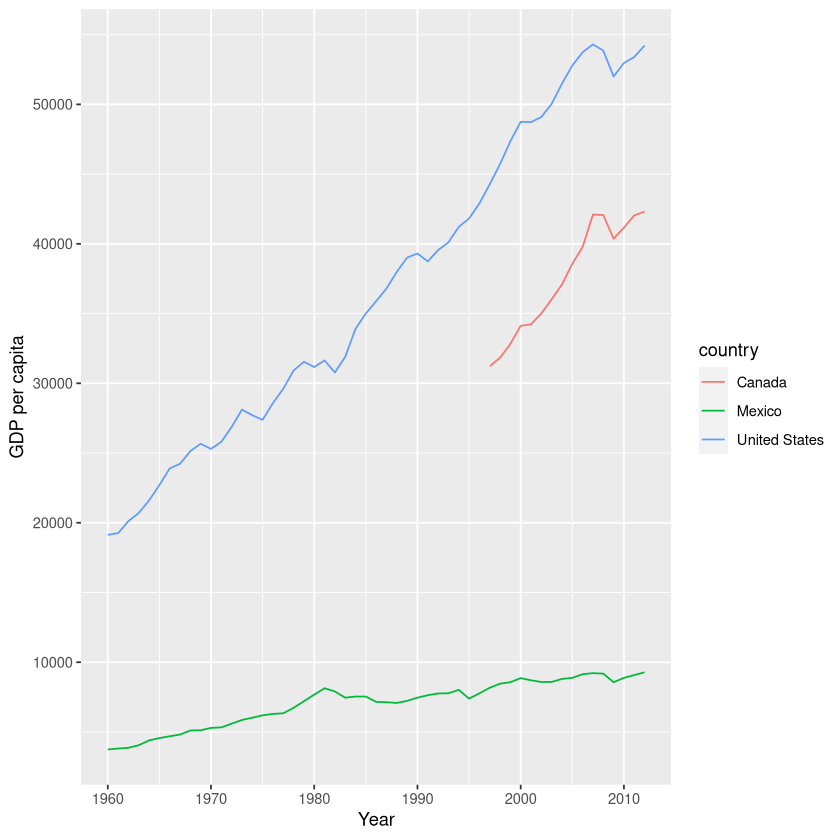

In [127]:
library(ggplot2)
ggplot(data, aes(year, NY.GDP.PCAP.KD, color=country)) + 
  geom_line() + 
  xlab('Year') + 
  ylab('GDP per capita')

# EUR-LEX API

## Prozedere

* Es ist sowohl ein User-Account bei EUR-LEX als auch eine Beantragung zur Freischaltung der API notwendig. Nähere Informationen finden sich [hier](https://eur-lex.europa.eu/content/help/data-reuse/webservice.html).
* Dokumentation der Zugänge:
    * [EUR-LEX Data Extraction Using Web Services](https://eur-lex.europa.eu/content/tools/webservices/DataExtractionUsingWebServices-v1.00.pdf).
    * [Web Service User Manual](https://eur-lex.europa.eu/content/tools/webservices/SearchWebServiceUserManual_v2.00.pdf).

## SOAP Envelope

Der Zugang zur EUR-LEX API funktioniert mittels des [SOAP](https://de.wikipedia.org/wiki/SOAP) Envelope Verfahrens. Hierbei muss eine zusätzliches XML Objekt mit einer POST-Anfrage verschickt werden. Ein potentielles Vorgehen findet sich [hier](https://stackoverflow.com/questions/62668337/how-to-do-a-soap-request-for-eur-lex-api-with-r).

## SparQL

Alternativ besteht die Möglichkeit eine [SparQL](https://en.wikipedia.org/wiki/SPARQL) Suchanfrage über die [Webtools](https://op.europa.eu/en/web/webtools/linked-data-and-sparql) des Publication Office of the European Union zu stellen.